# Probability Assignment

To get full credit in this assignment you need to use `numpy`, `scipy` and `pandas` libraries. Sometimes you need to type equations - type equations in Latex math notation. To produce the plots you can use any plotting library you need.

PS1: We run the assignment through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions.

PS2: We are also monitoring solution websites and we will take action against anyone that uploads this to a solution website.

## Problem 1 (80 points)

A surgeon analyzes surgical videos and models events that occur. He describes the problem statement in [here](https://thomasward.com/simulating-correlated-data/). Your job is to replicate the solution in Python and demonstrate your understanding of the steps performed by  including adequate explanation of the code in either markdown cells or inline to the code.  You can insert as many markdown or code cells you need to perform the analysis. 


## Question 1a (10 points)

Write the code for generating the `gs` variable. This is the simplest random variable of the problem and can be generated independent of the others. 

Generated glove size (first 10 values): [5.85732055 6.62511311 4.74827979 7.4315288  5.87003557 6.07954495
 6.15047194 4.45797023 6.93390538 5.42072593]


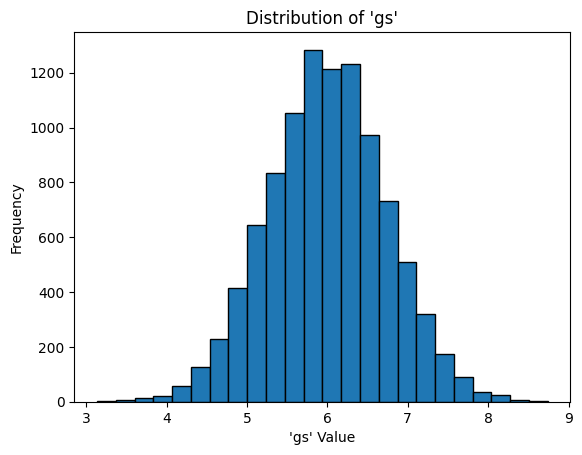

In [8]:
# Code here
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the glove size simulation
mean_gs = 6  # Mean glove size
std_dev_gs = 0.724  # Standard deviation of glove sizes
num_samples = 10000  # Number of samples to generate

# Generate glove size variable using a normal distribution
gs = np.random.normal(mean_gs, std_dev_gs, num_samples)

# Display the first 10 values of the generated glove size variable
print("Generated glove size (first 10 values):", gs[:10])

# Plot the generated glove variables
plt.hist(gs, bins=24, edgecolor='black')
plt.xlabel("'gs' Value")
plt.ylabel("Frequency")
plt.title("Distribution of 'gs'")
plt.show()


## Question 1b (20 points)

We have three variables, `ak`, `pp`, and `ptime`. Write the code for generating these variables from Multivate Gaussian distribution and replicate the associated plots. 



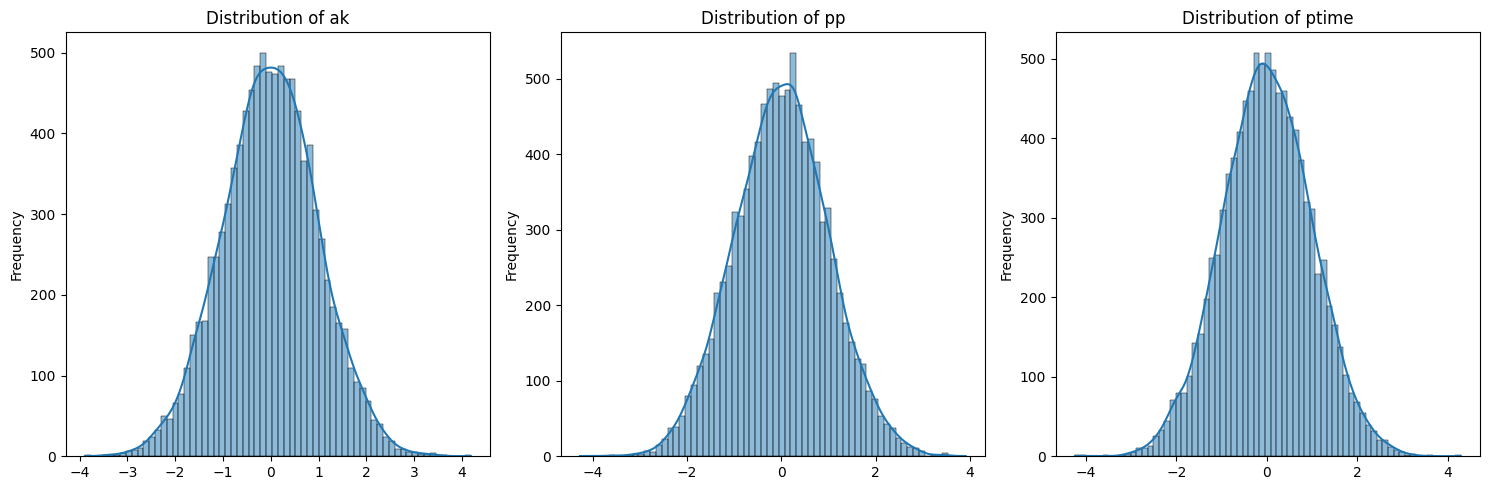

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


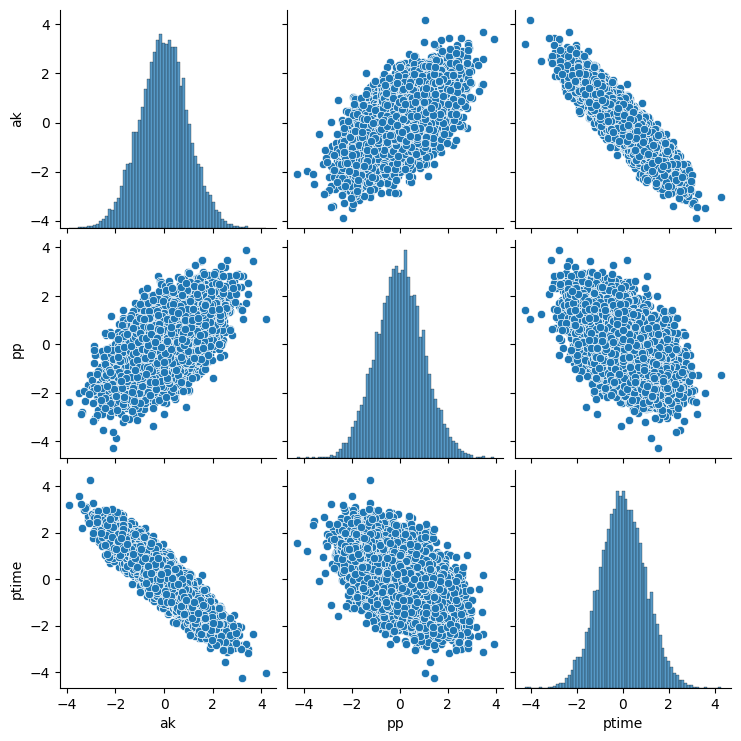

In [33]:
# Code here
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
import seaborn as sns
import pandas as pd

# Set the seed for reproducibility
np.random.seed(4224)

# Parameters for the multivariate Gaussian distribution
mean = np.zeros(3)
covarianceMatrix = np.array([[1.0, 0.5995270, -0.9012733],
                              [0.5995270, 1.0, -0.5001539],
                              [-0.9012733, -0.5001539, 1.0]])

# Sample from the multivariate Gaussian distribution
numSamples = 10000
samples = np.random.multivariate_normal(mean, covarianceMatrix, size=numSamples)

# Extract variables ak, pp, and ptime
ak = samples[:, 0]
pp = samples[:, 1]
ptime = samples[:, 2]

# Plot the distributions and pairs plot
plt.figure(figsize=(15, 5))

# Plot ak
plt.subplot(131)
sns.histplot(ak, kde=True)
plt.title('Distribution of ak')
plt.ylabel("Frequency")

# Plot pp
plt.subplot(132)
sns.histplot(pp, kde=True)
plt.title('Distribution of pp')
plt.ylabel("Frequency")

# Plot ptime
plt.subplot(133)
sns.histplot(ptime, kde=True)
plt.title('Distribution of ptime')
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Pairs plot
pairplotData = {'ak': ak, 'pp': pp, 'ptime': ptime}
pairplot_df = pd.DataFrame(pairplotData)
sns.pairplot(pairplot_df)
plt.show()


## Question 1c (20 points)

Perform the probability inrtegral transform and replicate the associated plots.

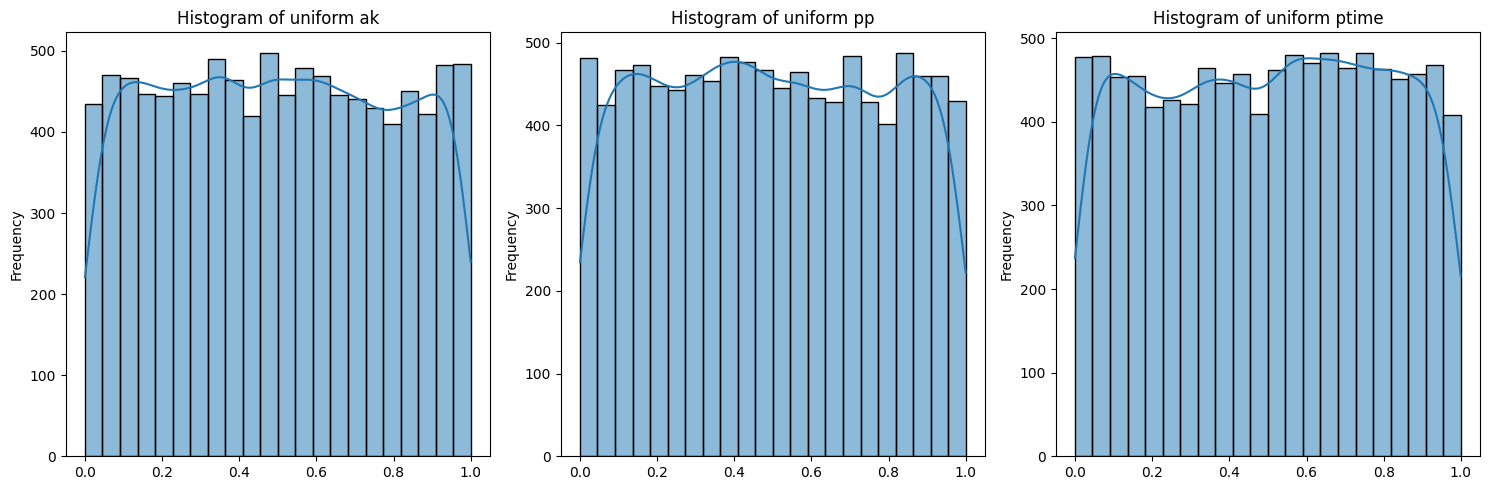

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


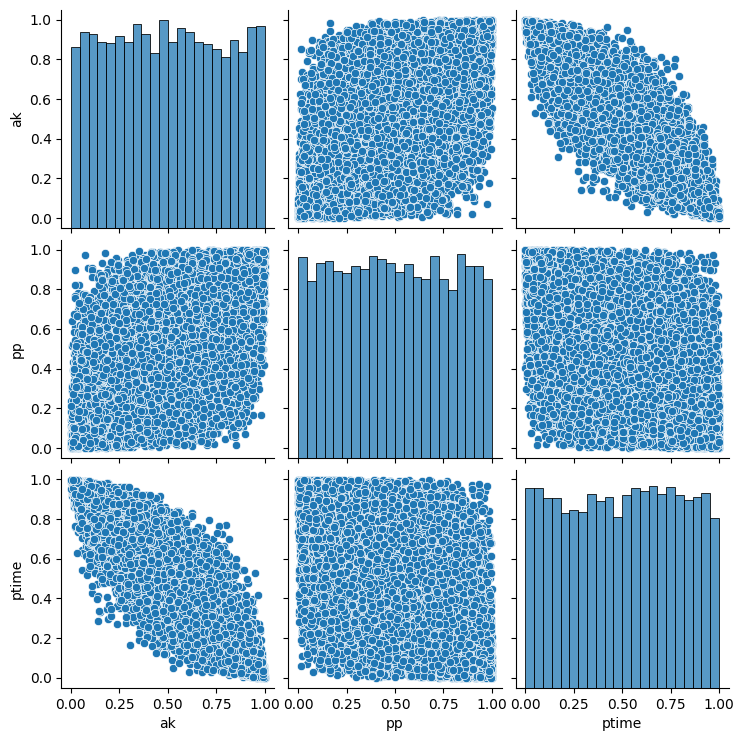

In [31]:
# Code here
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson

# Apply the cumulative distribution function (cdf) to obtain uniform distributions
uni_ak = norm.cdf(ak)
uni_pp = norm.cdf(pp)
uni_ptime = norm.cdf(ptime)

# Create a DataFrame for the uniform variables
uniform_df = pd.DataFrame({'ak': uni_ak, 'pp': uni_pp, 'ptime': uni_ptime})

# Plot the distributions of uniform variables
plt.figure(figsize=(15, 5))

# Plot uniform ak
plt.subplot(131)
sns.histplot(uni_ak, kde=True)
plt.title('Histogram of uniform ak')
plt.ylabel("Frequency")

# Plot uniform pp
plt.subplot(132)
sns.histplot(uni_pp, kde=True)
plt.title('Histogram of uniform pp')
plt.ylabel("Frequency")

# Plot uniform ptime
plt.subplot(133)
sns.histplot(uni_ptime, kde=True)
plt.title('Histogram of uniform ptime')
plt.ylabel("Frequency")

# Display Histograms
plt.tight_layout()
plt.show()

# Pairs plot for the uniform variables
sns.pairplot(uniform_df)
plt.show()


## Question 1d (20 points)

Perform the inverse transform sampling.

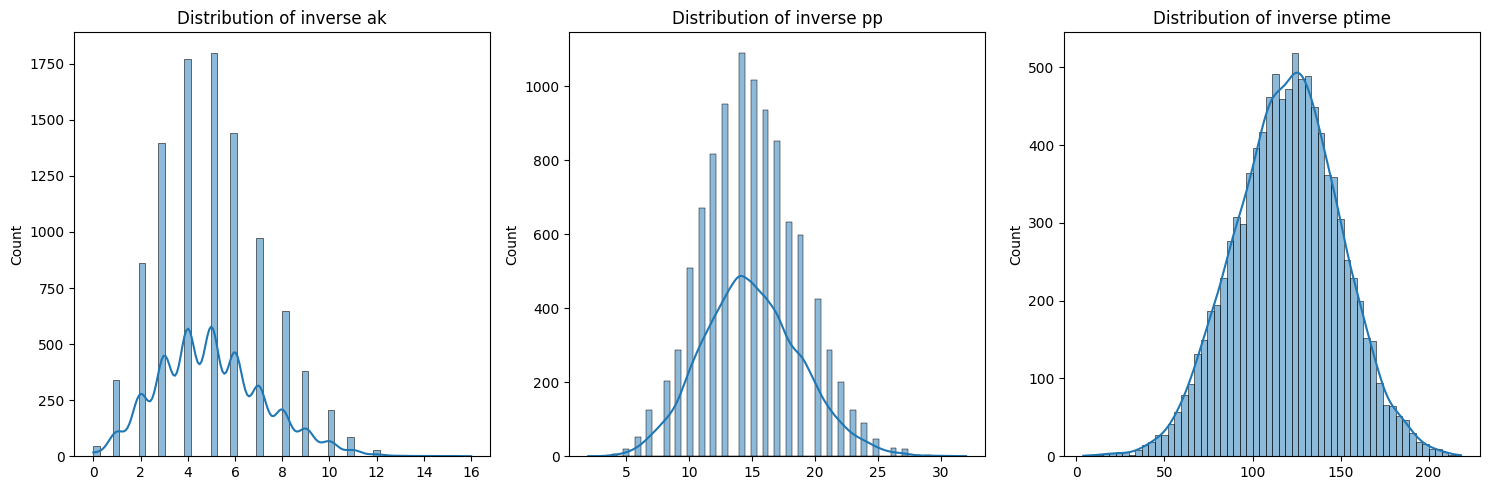

In [30]:
# Code here
from scipy.stats import poisson, norm

# Parameters for the respective distributions
mu_ak = 5  # Poisson parameter for ak
mu_pp = 15  # Poisson parameter for pp
mean_ptime = 120  # Mean for ptime
stdDev_ptime = 30  # Standard deviation for ptime

# Inverse transform sampling for the respective distributions
ak_inverseTransformed = poisson.ppf(u_ak, mu_ak)
pp_inverseTransformed = poisson.ppf(u_pp, mu_pp)
ptime_inverseTransformed = norm.ppf(u_ptime, loc=mean_ptime, scale=stdDev_ptime)

# Plot the distributions of the inverse transformed variables
plt.figure(figsize=(15, 5))

# Plot ak_inverse_transformed
plt.subplot(131)
sns.histplot(ak_inverseTransformed, kde=True)
plt.title('Histogram of inverse ak')

# Plot pp_inverse_transformed
plt.subplot(132)
sns.histplot(pp_inverseTransformed, kde=True)
plt.title('Histogram of inverse pp')

# Plot ptime_inverse_transformed
plt.subplot(133)
sns.histplot(ptime_inverseTransformed, kde=True)
plt.title('Histogram of inverse ptime')

plt.tight_layout()
plt.show()


## Question 1e (10 points)

Replicate the final plot showcasing the correlations between the variables.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


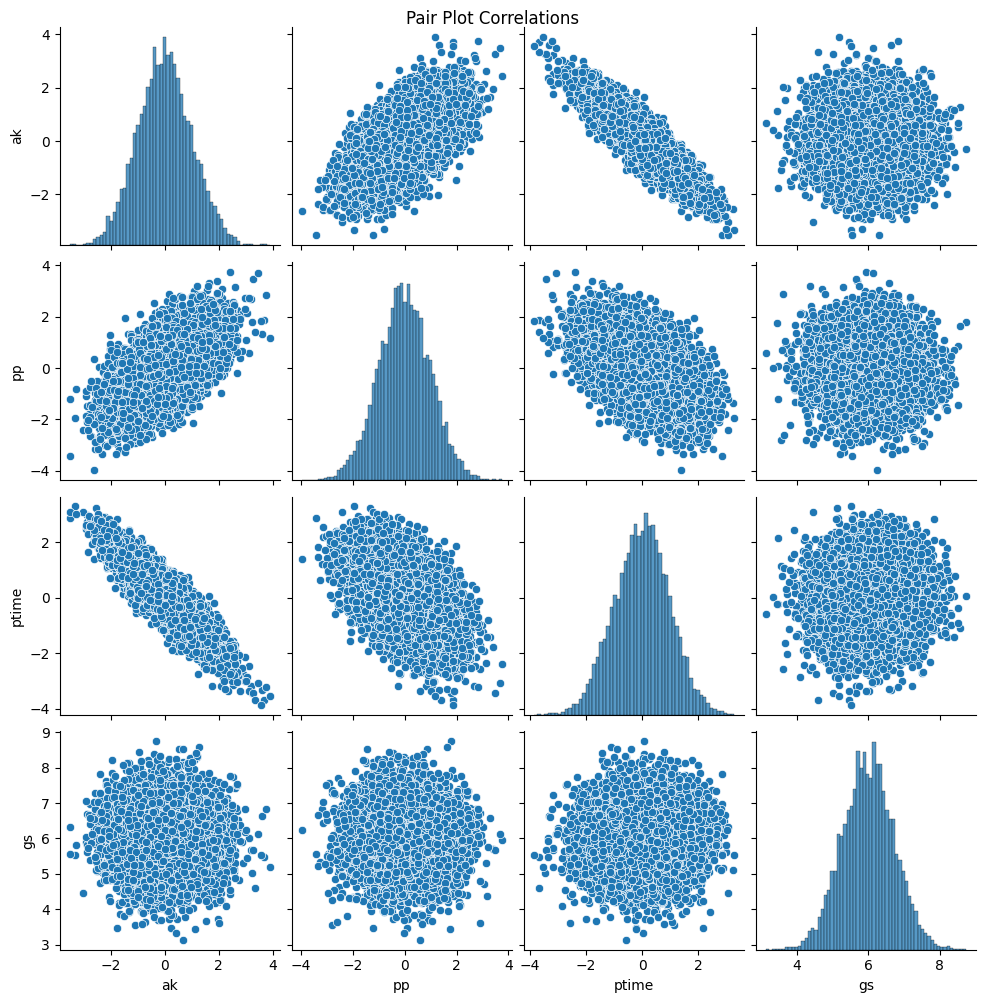

In [19]:
# Code here
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame with desired variables
data = pd.DataFrame({'ak': ak, 'pp': pp, 'ptime': ptime, 'gs': gs})

# Display correlations with a pair plot
sns.pairplot(data)
plt.suptitle('Pair Plot Correlations', y=1.0)
plt.show()


## Problem 2 (20 points)

You now pretend that the $n=4$ dimensional data you generated in Problem 1 arrive sequentially one at a time (the co-called **online** learning setting). Introduce the index $i$ to represent the ith arriving data sample $\mathbf x_i$. 

1. Write the expression of the *sample* correlation matrix (5 points)
2. Write the expression of the sample correlation matrix that can be estimated recursively and plot the elements of the sample correlation matrix from $i=1$ to $i=100$ (15 points)

### Answer 2.1

$$ R_i = \frac{1}{I} \sum_{k=1}^{I} x_k \cdot {x^T_k} $$

#### To compute sample correlation matrix

$$ R_i = \frac{1}{i} ((i-1)) R_{i-1} + x_i \cdot {x^T_i} $$

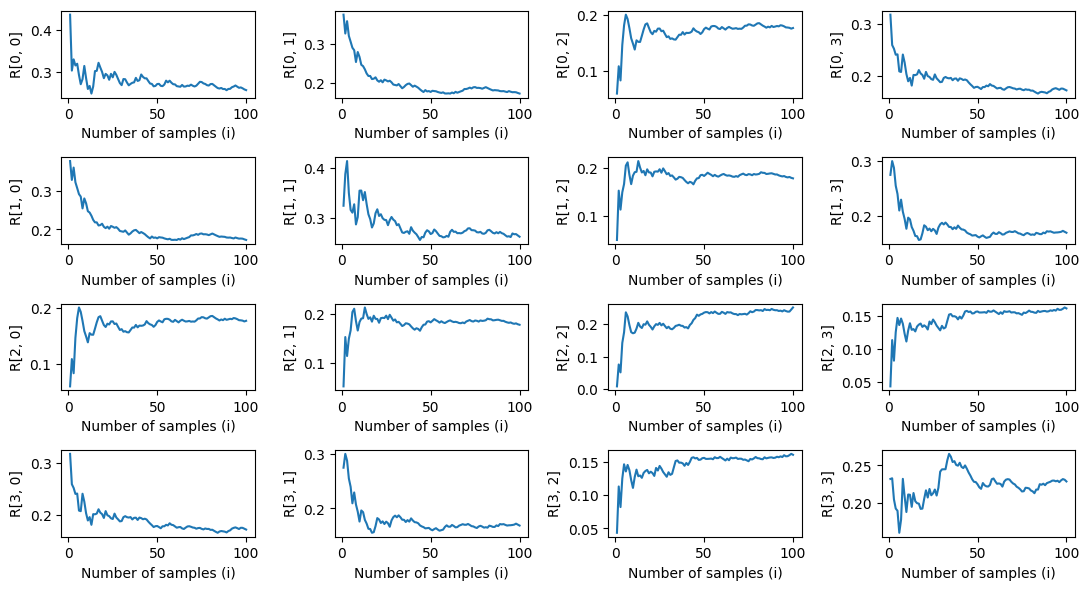

In [7]:
# Code here
import numpy as np
import matplotlib.pyplot as plt

# Dimension of the data
dimension = 4

# Number of samples
num_samples = 100

# Initialize variables
correlation_matrix_elements = np.zeros((num_samples, dimension, dimension))

# Simulate learning 
for i in range(1, num_samples + 1):
    # Generate random data 
    x_i = np.random.rand(dimension)
    x_i = x_i / np.linalg.norm(x_i)  # Normalize the vector
    
    # Update sample correlation matrix elements recursively
    if i == 1:
        correlation_matrix_elements[i - 1] = np.outer(x_i, x_i)
    else:
        correlation_matrix_elements[i - 1] = (i - 1) / i * correlation_matrix_elements[i - 2] + \
                                               1 / i * np.outer(x_i, x_i)

# Plot the elements of the sample correlation matrix
plt.figure(figsize=(11, 6))
for i in range(dimension):
    for j in range(dimension):
        plt.subplot(dimension, dimension, i * dimension + j + 1)
        plt.plot(range(1, num_samples + 1), correlation_matrix_elements[:, i, j])
        plt.xlabel('Number of samples (i)')
        plt.ylabel(f'R[{i}, {j}]')
plt.tight_layout()
plt.show()
